In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/data_sets/csv9.csv'
df = pd.read_csv(path)

In [ ]:
df.dropna(axis = 'columns', thresh=3000, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          4510 non-null   int64  
 1   id                                  4510 non-null   int64  
 2   name                                4510 non-null   object 
 3   symbol                              4510 non-null   object 
 4   slug                                4510 non-null   object 
 5   num_market_pairs                    4510 non-null   int64  
 6   date_added                          4510 non-null   object 
 7   tags                                4510 non-null   object 
 8   circulating_supply                  4510 non-null   float64
 9   total_supply                        4510 non-null   float64
 10  infinite_supply                     4510 non-null   bool   
 11  cmc_rank                            4510 no

In [ ]:
df.drop(columns=['Unnamed: 0', 'id', 'slug', 'num_market_pairs',
       'tags', 'circulating_supply', 'total_supply',
       'infinite_supply', 'cmc_rank', 'last_updated',
       'quote.USD.volume_24h', 'quote.USD.volume_change_24h',
       'quote.USD.market_cap', 'quote.USD.market_cap_dominance',
       'quote.USD.fully_diluted_market_cap', 'quote.USD.last_updated'], inplace=True)

In [ ]:
df.rename(columns={'quote.USD.price':'USD_price','quote.USD.percent_change_1h':'percent_ch_1h', 'quote.USD.percent_change_7d':'percent_ch_7d',
                   'quote.USD.percent_change_24h':'percent_ch_24h', 'quote.USD.percent_change_30d':'percent_ch_30d',
                   'quote.USD.percent_change_60d':'percent_ch_60d', 'quote.USD.percent_change_90d':'percent_ch_90d'}, inplace=True)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# for d in df['last_runtime(GMT)']:
#   df['date'] = d.date
#   df['time'] = d.time

In [ ]:
df.head()

,name,symbol,date_added,USD_price,percent_ch_1h,percent_ch_24h,percent_ch_7d,percent_ch_30d,percent_ch_60d,percent_ch_90d,last_runtime(GMT)
0,Bitcoin,BTC,2010-07-13T00:00:00.000Z,29270.404828,0.031291,0.335261,0.178063,-4.982941,7.623398,-0.959570,2023-08-03 21:51:03.869904
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,1841.509441,-0.264086,-0.088538,-1.047538,-5.157880,-3.169145,-7.422219,2023-08-03 21:51:03.869904
2,Tether USDt,USDT,2015-02-25T00:00:00.000Z,0.999232,0.014582,-0.018713,-0.068324,-0.104839,-0.098065,-0.173118,2023-08-03 21:51:03.869904
3,BNB,BNB,2017-07-25T00:00:00.000Z,241.063539,-0.016522,-0.248687,0.173811,-0.585550,-21.187187,-26.357413,2023-08-03 21:51:03.869904
4,XRP,XRP,2013-08-04T00:00:00.000Z,0.671357,-0.387080,-2.458239,-6.077239,37.349281,24.194482,43.561717,2023-08-03 21:51:03.869904


In [ ]:
df_usd = df[['name', 'percent_ch_7d', 'last_runtime(GMT)']]
df_usd.head()

,name,percent_ch_7d,last_runtime(GMT)
0,Bitcoin,0.178063,2023-08-03 21:51:03.869904
1,Ethereum,-1.047538,2023-08-03 21:51:03.869904
2,Tether USDt,-0.068324,2023-08-03 21:51:03.869904
3,BNB,0.173811,2023-08-03 21:51:03.869904
4,XRP,-6.077239,2023-08-03 21:51:03.869904


<ipython-input-11-c69eac50b9e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usd['last_runtime(GMT)'] = pd.to_datetime(df_usd['last_runtime(GMT)'])
<ipython-input-11-c69eac50b9e7>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


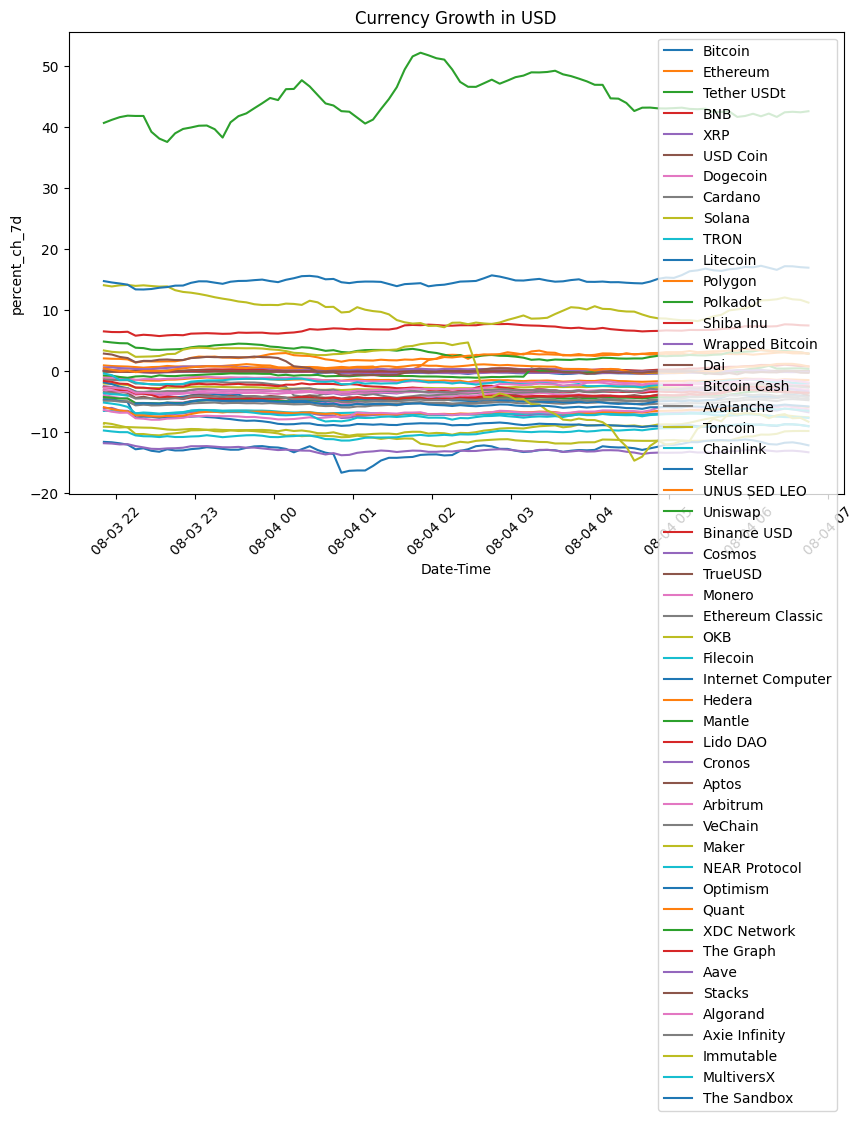

In [ ]:
import matplotlib.pyplot as plt

# Convert date-time column to pandas datetime objects
df_usd['last_runtime(GMT)'] = pd.to_datetime(df_usd['last_runtime(GMT)'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each currency and plot its growth over time
currencies = df_usd['name'].unique()
for currency in currencies:
    currency_data = df_usd[df_usd['name'] == currency]
    ax.plot(currency_data['last_runtime(GMT)'], currency_data['percent_ch_7d'], label=currency)

# Customize the plot
ax.set_xlabel('Date-Time')
ax.set_ylabel('percent_ch_7d')
ax.set_title('Currency Growth in USD')
ax.legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
